In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate
from sklearn.feature_selection import f_regression, mutual_info_regression 
from sklearn import ensemble

In [2]:
df = pd.read_csv('stationary_data.csv')# read in cleaned data set, stationary years

In [3]:
df.head()

,Year,Month,ZipCode,ZORI,ZHVI,AQI,Population,Unemployment,Percent Bachelors,Units,Total_Households,Med_income,PCE,Rental Vacancy Rate
0,2015,2,10025,3162.0,1171181.0,60.928571,1.623301e+06,5.6,32.2,1126.0,7.304468e+05,72743.449947,1.328401,4.4
1,2015,2,60657,1643.0,446997.0,52.785714,5.232495e+06,6.7,22.1,1191.0,1.942356e+06,54319.591794,1.328401,5.4
2,2015,2,10023,3229.0,1104524.0,60.928571,1.623301e+06,5.6,32.2,1126.0,7.304468e+05,72743.449947,1.328401,4.4
3,2015,2,60614,1808.0,578551.0,52.785714,5.232495e+06,6.7,22.1,1191.0,1.942356e+06,54319.591794,1.328401,5.4
4,2015,2,77449,1361.0,151529.0,48.892857,4.299820e+06,4.4,19.0,5938.0,1.511400e+06,53157.359233,1.328401,6.8


 # Unemployment

<AxesSubplot:>

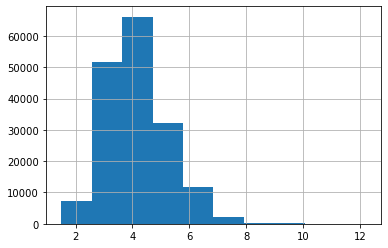

In [5]:
%matplotlib inline
df.Unemployment.hist()

<AxesSubplot:xlabel='Month'>

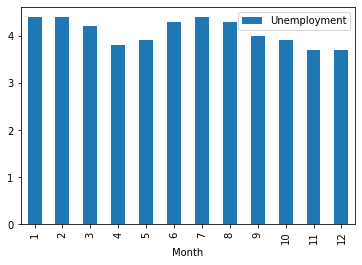

In [8]:
#visulize seasonal change in employment
df.groupby('Month')[['Unemployment']].median().reset_index().plot(x='Month', y='Unemployment', kind='bar')

<AxesSubplot:xlabel='ZORI', ylabel='Unemployment'>

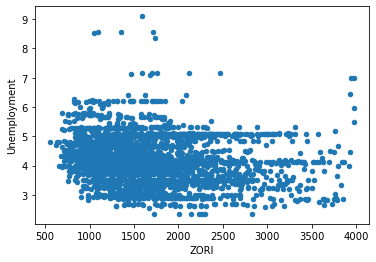

In [10]:
#no obvious correlation between unemployment and ZORI
df[df['ZORI']<4000].groupby('ZipCode')[['Unemployment', 'ZORI']].mean().reset_index().plot(x='ZORI', y='Unemployment', kind='scatter')

In [11]:
df[df['ZORI']<4000][['Unemployment','ZORI']].corr()

,Unemployment,ZORI
Unemployment,1.000000,-0.218124
ZORI,-0.218124,1.000000


# Units (units with construction permits application)

<AxesSubplot:>

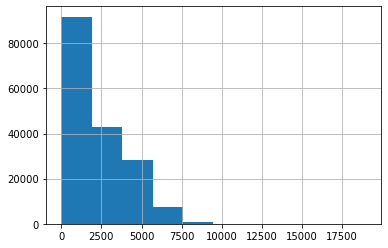

In [12]:
df.Units.hist()

<AxesSubplot:xlabel='Month'>

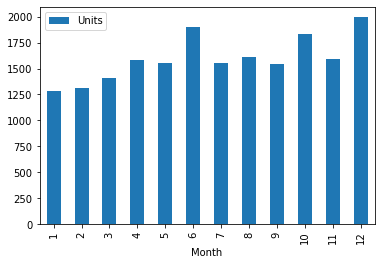

In [13]:
#visulize seasonal change in applications
df.groupby('Month')[['Units']].median().reset_index().plot(x='Month', y='Units', kind='bar')

<AxesSubplot:xlabel='Year'>

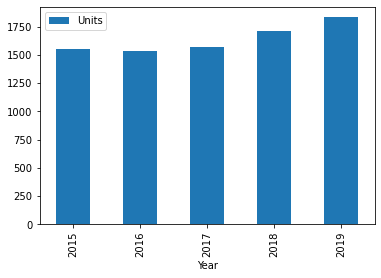

In [16]:
#change in applications by year
df.groupby('Year')[['Units']].median().reset_index().plot(x='Year', y='Units', kind='bar')

<AxesSubplot:xlabel='Year'>

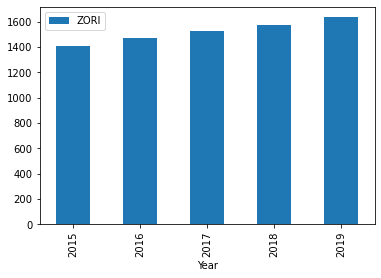

In [17]:
df.groupby('Year')[['ZORI']].median().reset_index().plot(x='Year', y='ZORI', kind='bar')

<AxesSubplot:xlabel='ZORI', ylabel='Units'>

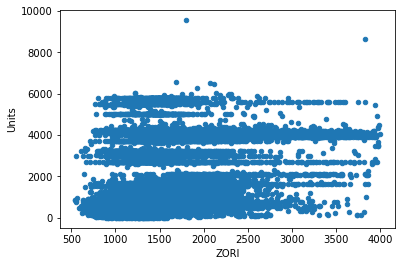

In [19]:
df[df['ZORI']<4000].groupby(['ZipCode','Year'])[['Units', 'ZORI']].mean().reset_index().plot(x='ZORI', y='Units', kind='scatter')

In [20]:
df[df['ZORI']<4000][['Units','ZORI']].corr()

,Units,ZORI
Units,1.000000,0.267666
ZORI,0.267666,1.000000


# Education

<AxesSubplot:>

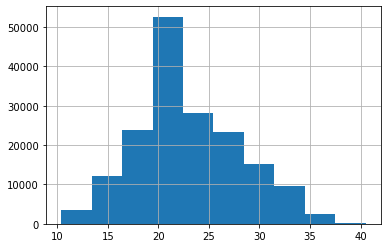

In [21]:
df['Percent Bachelors'].hist()

<AxesSubplot:xlabel='Year'>

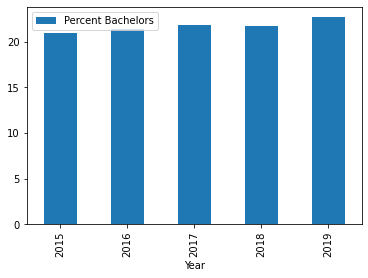

In [22]:
df.groupby('Year')[['Percent Bachelors']].median().reset_index().plot(x='Year', y='Percent Bachelors', kind='bar')

In [23]:
df[df['ZORI']<4000][['Percent Bachelors','ZORI']].corr()

,Percent Bachelors,ZORI
Percent Bachelors,1.000000,0.344108
ZORI,0.344108,1.000000


<AxesSubplot:xlabel='ZORI', ylabel='Percent Bachelors'>

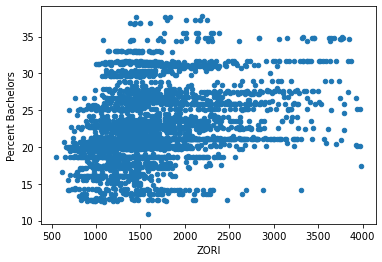

In [24]:
#no obvious correlation between unemployment and ZORI
df[df['ZORI']<4000].groupby('ZipCode')[['Percent Bachelors', 'ZORI']].mean().reset_index().plot(x='ZORI', y='Percent Bachelors', kind='scatter')

In [18]:
df[df['ZORI']<4000].groupby(['ZipCode','Year'])['ZORI'].mean().unstack('Year')

Year,2015,2016,2017,2018,2019
ZipCode,,,,,
1432,1065.750000,1084.555556,1130.454545,1183.100000,1232.250000
1603,1170.111111,1285.000000,1292.000000,1362.250000,1412.111111
1604,1150.818182,1210.583333,1246.500000,1327.416667,1407.500000
1605,1115.909091,1182.833333,1244.833333,1342.583333,1433.416667
1609,1028.363636,1082.250000,1161.700000,1254.166667,1316.500000
...,...,...,...,...,...
99204,711.625000,760.000000,815.000000,904.000000,976.416667
99205,755.818182,826.818182,917.583333,1026.272727,1084.416667
99206,945.000000,1005.727273,1069.250000,1122.333333,1231.750000
